In [2]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [9]:
def fibonacci_sphere(R=1.0, samples=1):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = R*(1 - (i / float(samples - 1)) * 2)  # y goes from 1 to -1
        radius = math.sqrt(R*R - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append([x, y, z])

    return points



def trimer(R=1.0, samples=1):

    points = []
    phi = math.pi * (360 + 10*1.55)/180/3  # twist angle in radians
    rise = 10 * 4.75/1000/3                    # rise in kA

    for i in range(samples):
        z = i*rise  # y goes from 1 to -1

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * R
        y = math.sin(theta) * R

        points.append([x, y, z])

    return points

def fibonacci_cylinder(R=1.0, samples=1, rise=0.02):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        z = i*rise  # y goes from 1 to -1
        theta = phi * i  # golden angle increment

        x = math.cos(theta) * R
        y = math.sin(theta) * R

        points.append([x, y, z])

    return points

In [2]:
import sys
from io import StringIO
from IPython import get_ipython


class IpyExit(SystemExit):
    """Exit Exception for IPython.

    Exception temporarily redirects stderr to buffer.
    """
    def __init__(self):
        # print("exiting")  # optionally print some message to stdout, too
        # ... or do other stuff before exit
        sys.stderr = StringIO()

    def __del__(self):
        sys.stderr.close()
        sys.stderr = sys.__stderr__  # restore from backup


def ipy_exit():
    raise IpyExit


if get_ipython():    # ...run with IPython
    exit = ipy_exit  # rebind to custom exit
else:
    exit = exit      # just make exit importable

In [8]:
from scipy import integrate

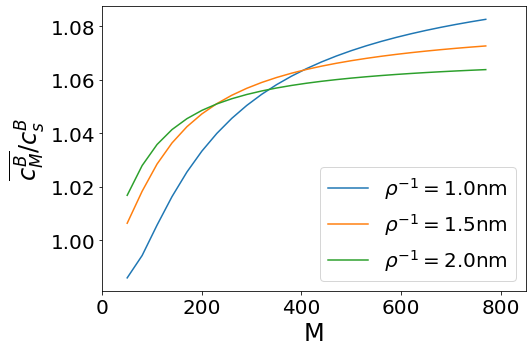

In [11]:
plt.figure(figsize=(7.5,5))
r_i = 0.1
r_o = 0.6
k_in = 2
coef = k_in/30/4/np.pi
epsilon = 0.005
#rise = 0.01
lamb0 = 1 + coef*(-1/(r_o-r_i))
#x = np.arange(50,400,30)
x = np.arange(50,800,30)


for i in range(3):
    rise = 0.01 + 0.005*i
    ansN = []

    for N in x:
        pos_B=fibonacci_cylinder(r_o,N,rise)
        pos_E=fibonacci_cylinder(r_i,N,rise)
        lamb=np.zeros((N,N))
        for j in range(N):
            for k in range(N):
                if j == k:
                    lamb[j][k] = lamb0
                else:
                    vec1 = np.subtract(pos_B[j], pos_B[k])
                    vec2 = np.subtract(pos_B[j], pos_E[k])
                    lamb[j][k] = coef*(1/np.sqrt(np.dot(vec1,vec1)) - 1/np.sqrt(np.dot(vec2,vec2)))
        lambr = np.linalg.inv(lamb)
        c0 = np.ones(N)
        ans = lambr.dot(c0)
        ansN.append(np.mean(ans)*lamb0)

    plt.plot(x,ansN,label=r"$\rho^{-1}=$"+str(round(rise,3)*100)+"nm")
    #print(ansN)
    
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,850)
plt.xlabel("M", fontsize=24)
plt.ylabel(r"$\overline{c^B_M}/c^B_s$", fontsize=24)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("new_cyl_cpeb_k2_l0.5.png")

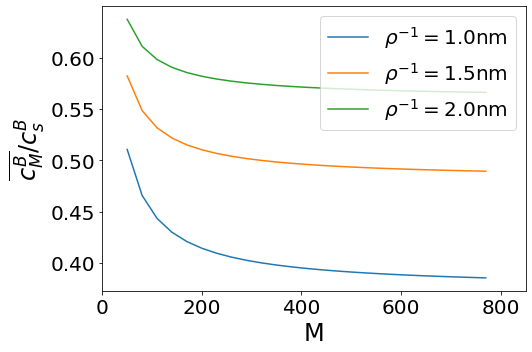

In [12]:
plt.figure(figsize=(7.5,5))
r_i = 0.1
r_o = 0.6
k_in = 2
coef = k_in/30/4/np.pi
epsilon = 0.005
#rise = 0.01
lamb0 = 1 + coef*(-1/(r_o-r_i))
#x = np.arange(50,400,30)
x = np.arange(50,800,30)

for i in range(3):
    rise = 0.01 + 0.005*i
    ansN = []

    for N in x:
        pos_E=fibonacci_cylinder(r_o,N,rise)
        pos_B=fibonacci_cylinder(r_i,N,rise)
        lamb=np.zeros((N,N))
        for j in range(N):
            for k in range(N):
                if j == k:
                    lamb[j][k] = lamb0
                else:
                    vec1 = np.subtract(pos_B[j], pos_B[k])
                    vec2 = np.subtract(pos_B[j], pos_E[k])
                    lamb[j][k] = coef*(1/np.sqrt(np.dot(vec1,vec1)) - 1/np.sqrt(np.dot(vec2,vec2)))
        lambr = np.linalg.inv(lamb)
        c0 = np.ones(N)
        ans = lambr.dot(c0)
        ansN.append(np.mean(ans)*lamb0)

    plt.plot(x,ansN,label=r"$\rho^{-1}=$"+str(round(rise,3)*100)+"nm")
    #print(ansN)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,850)
plt.xlabel("M", fontsize=24)
plt.ylabel(r"$\overline{c^B_M}/c^B_s$", fontsize=24)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("new_cyl_rim_k2_l0.5.png")

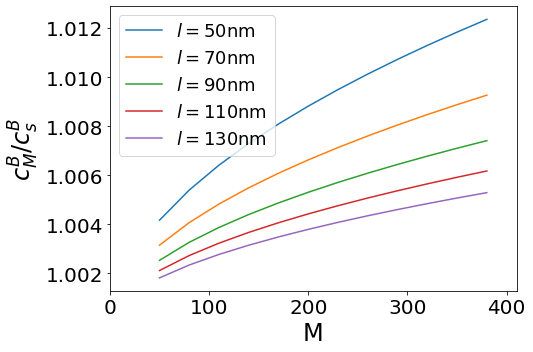

In [16]:
plt.figure(figsize=(7.5,5))
r_i = 0.1
k_in = 0.2
coef = k_in/30/4/np.pi
#epsilon = 0.005
x = np.arange(50,400,30)

for i in range(5):
    r_o = i*0.2 + 0.6

    lambN = []
    for N in x:
        pos_B=fibonacci_sphere(r_o,N)
        pos_E=fibonacci_sphere(r_i,N)
        lamb=0
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            lamb += 1/np.sqrt(np.dot(vec1,vec1)) - 1/np.sqrt(np.dot(vec2,vec2))

        lambN.append((1+coef*(-1/(r_o-r_i)))/(1+coef*(-1/(r_o-r_i)+lamb)))

    plt.plot(x,lambN,label="$l=$"+str(int(round((r_o-r_i),2)*100))+"nm")
    
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,410)
plt.xlabel("M", fontsize=24)
plt.ylabel("$c^B_M/c^B_s$", fontsize=24)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("new_sph_cpeb_k0.2.png")

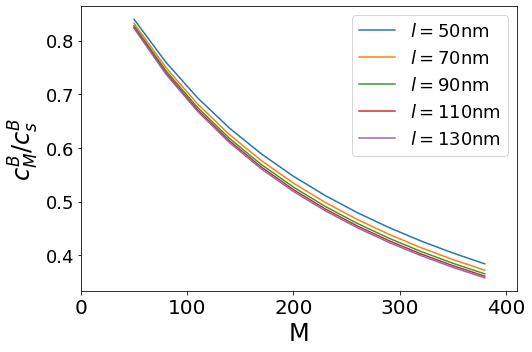

In [15]:
plt.figure(figsize=(7.5,5))
r_i = 0.1
k_in = 0.2
coef = k_in/30/4/np.pi
x = np.arange(50,400,30)

for i in range(5):
    r_o = i*0.2 + 0.6

    lambN = []
    for N in x:
        pos_B=fibonacci_sphere(r_i,N)
        pos_E=fibonacci_sphere(r_o,N)
        lamb=0
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            lamb += 1/np.sqrt(np.dot(vec1,vec1)) - 1/np.sqrt(np.dot(vec2,vec2))

        lambN.append((1+coef*(-1/(r_o-r_i)))/(1+coef*(-1/(r_o-r_i)+lamb)))

    plt.plot(x,lambN,label="$l=$"+str(int(round((r_o-r_i),2)*100))+"nm")
    
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=18)
plt.xlim(0,410)
plt.xlabel("M", fontsize=24)
plt.ylabel("$c^B_M/c^B_s$", fontsize=24)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("new_sph_rim_k0.2.png")

In [34]:
r_i = 0.1
r_o = 0.6
k_in = 2
coef = k_in/30/4/np.pi
lamb0 = 1 + coef*(-1/(r_o-r_i))

rise = 0.01
N = 100

#pos_B=fibonacci_cylinder(r_o,N,rise)
#pos_E=fibonacci_cylinder(r_i,N,rise)

pos_E=fibonacci_cylinder(r_o,N,rise)
pos_B=fibonacci_cylinder(r_i,N,rise)

lamb=np.zeros((N,N))
for j in range(N):
    for k in range(N):
        if j == k:
            lamb[j][k] = lamb0
        else:
            vec1 = np.subtract(pos_B[j], pos_B[k])
            vec2 = np.subtract(pos_B[j], pos_E[k])
            lamb[j][k] = coef*(1/np.sqrt(np.dot(vec1,vec1)) - 1/np.sqrt(np.dot(vec2,vec2)))
#lambr = np.linalg.inv(lamb)
c0 = np.ones(N)
ans = np.linalg.solve(lamb,c0)

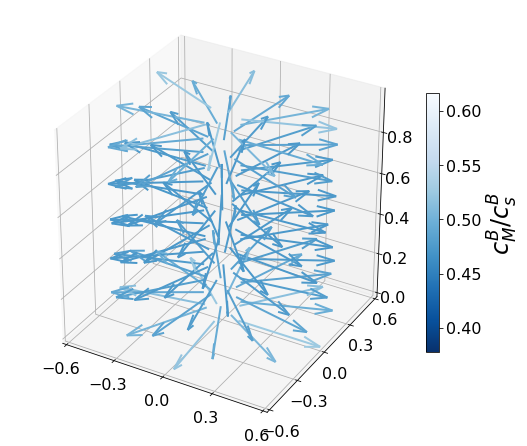

In [37]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
cmap = plt.get_cmap('Blues_r')


tmp=np.transpose(pos_B)
tmp2=np.transpose(pos_E)
c=ans*lamb0
c = np.concatenate((c, np.repeat(c, 2)))
ax.quiver(tmp[0], tmp[1], tmp[2], tmp2[0]-tmp[0], tmp2[1]-tmp[1], tmp2[2]-tmp[2], color=cmap(c),arrow_length_ratio=0.2,lw=2)

# ax.set_xlim3d(-10, 10)
# ax.set_ylim3d(-10,10)
# ax.set_zlim3d(0, 20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='z', labelsize=16)
plt.xticks(np.arange(-0.6,0.7,0.3))
plt.yticks(np.arange(-0.6,0.7,0.3))
#plt.xlabel("100 nm", fontsize=18)
#plt.ylabel("100 nm", fontsize=18)
#ax.set_zlabel("100 nm", fontsize=18)

cbar=fig.colorbar(p,ax=ax,fraction=0.03, pad=0)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label("$c^B_M/c^B_s$", fontsize=24)
#fig.tight_layout()

plt.savefig("new_cyl_rim_k2_l0.5_rho0.01_M100.png")

In [7]:
from scipy import integrate

In [10]:
r_i = 0.1
r_o = 0.6#1.1
D_o=30
N = 2000
D_in = [1]


g_io=[]
g_oo=[]


for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    lambN = []
    y1 = lambda t: t**(-D_i/D_p)/(r_o-r_i*t)
    lamb1=2/D_p/(r_o-r_i)-(D_m/D_p**2)*(integrate.quad(y1, 0, 1)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_i/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)

    pos_B=fibonacci_sphere(r_o,N)
    pos_E=fibonacci_sphere(r_i,N)

    g_io.append(lamb1/4/np.pi)
    g_oo.append(np.NaN)
    
    for j in range(1,N):
        vec1 = np.subtract(pos_B[0], pos_B[j])
        vec2 = np.subtract(pos_B[0], pos_E[j])
        lambi =  2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
            (D_m/D_p**2)*(integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])
        
        lambo = 2/D_p/np.sqrt(np.dot(vec1,vec1)) - \
            (D_m/D_p**2)*(integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_B[j][0],pos_B[j][1],pos_B[j][2]))[0])

        g_io.append(lambi/4/np.pi)
        g_oo.append(lambo/4/np.pi)
np.savetxt('g_io.txt',g_io)
np.savetxt('g_oo.txt',g_oo)

In [11]:
r_i = 0.1
r_o = 0.6#1.1
rk = r_o/r_i
D_o=30
N = 2000
D_in = [1]


g_ii=[]
g_oi=[]

rate=[]
for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i

    y1 = lambda t: t**(-D_o/D_p)/(r_o*t-r_i)
    lamb1=2/D_p/(r_o-r_i)-(D_m/D_p**2)*(integrate.quad(y1, 1, np.inf)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)

    
    pos_E=fibonacci_sphere(r_o,N)
    pos_B=fibonacci_sphere(r_i,N)
    
    g_oi.append(lamb1/4/np.pi)
    g_ii.append(np.NaN)
    
    for j in range(1,N):
        vec1 = np.subtract(pos_B[0], pos_B[j])
        vec2 = np.subtract(pos_B[0], pos_E[j])
        vec3 = np.subtract(pos_B[0], [rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]])
        lambi = 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - \
            (D_m/D_p**2)*(rk*integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]))[0] )
        lambo = 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
            (D_m/D_p**2)*(integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])

        g_ii.append(lambi/4/np.pi)
        g_oi.append(lambo/4/np.pi)
np.savetxt('g_ii.txt',g_ii)
np.savetxt('g_oi.txt',g_oi)

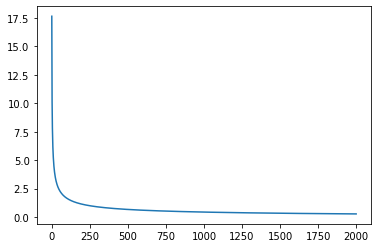

In [12]:
plt.plot(g_ii)